## Wann ist ein Model gut, wie kann man es messen?

Da es sich hier um ein Klassifizierungsmodel handelt, ist die Anzahl der korrekten Erkennungen ausschlaggebend. 
Diese wird mit der Accuracy ausgedrückt, von , 0 keine richtigen Erkennungen, bis 1, alles richtig erkannt.

In [2]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns



# SVM

Accuracy: 0.9860917941585535


<Figure size 640x480 with 0 Axes>

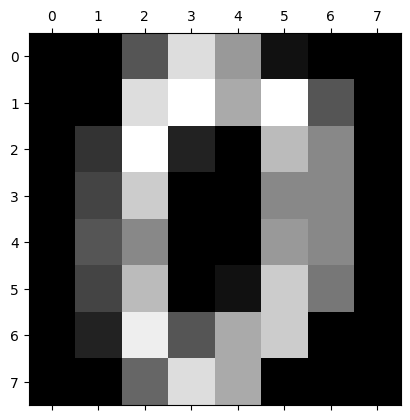

In [3]:
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.4, random_state=42)
svm=SVC()
svm.fit(X_train, y_train)

accuracy = svm.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

plt.gray()
plt.matshow(digits.images[0])

# Genauigkeit: 0.986


In [4]:
y_predict=svm.predict(X_test)
print(confusion_matrix(y_test,y_predict))

[[67  0  0  0  0  0  0  0  0  0]
 [ 0 72  0  0  0  0  0  0  0  0]
 [ 0  0 66  0  0  0  0  0  0  0]
 [ 0  0  0 69  0  1  0  0  1  0]
 [ 0  0  0  0 78  0  0  0  0  0]
 [ 0  0  0  0  0 82  1  0  0  0]
 [ 0  0  0  0  0  0 69  0  0  0]
 [ 0  0  0  0  0  0  0 70  0  1]
 [ 0  2  0  0  0  0  0  0 62  1]
 [ 0  0  0  1  0  0  0  1  1 74]]


In [5]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.97      1.00      0.99        72
           2       1.00      1.00      1.00        66
           3       0.99      0.97      0.98        71
           4       1.00      1.00      1.00        78
           5       0.99      0.99      0.99        83
           6       0.99      1.00      0.99        69
           7       0.99      0.99      0.99        71
           8       0.97      0.95      0.96        65
           9       0.97      0.96      0.97        77

    accuracy                           0.99       719
   macro avg       0.99      0.99      0.99       719
weighted avg       0.99      0.99      0.99       719



## SVC mit Parameter Optimierung(einfach)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, 

<Figure size 640x480 with 0 Axes>

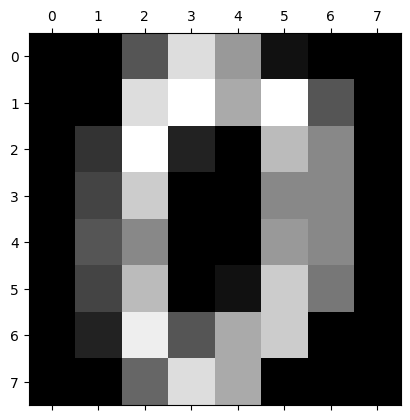

In [6]:

# GridSearchCV für die Optimierung von Hyperparametern
param_grid = {
    'C': [0.1, 1, 10, 100,50],
    'gamma': [0.001, 0.01, 0.1, 1,0.002,0.0015,0.0009],
    'kernel': ['rbf', 'poly', 'sigmoid']
}


grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)
print(f"Beste Parameter: {grid.best_params_}")

accuracy = grid.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

plt.gray()
plt.matshow(digits.images[0])

In [7]:
y_predict=grid.predict(X_test)
print(confusion_matrix(y_test,y_predict))

[[67  0  0  0  0  0  0  0  0  0]
 [ 0 72  0  0  0  0  0  0  0  0]
 [ 0  0 66  0  0  0  0  0  0  0]
 [ 0  0  0 69  0  1  0  0  1  0]
 [ 0  0  0  0 78  0  0  0  0  0]
 [ 0  0  0  0  0 83  0  0  0  0]
 [ 0  0  0  0  0  0 69  0  0  0]
 [ 0  0  0  0  0  0  0 70  0  1]
 [ 0  0  0  0  0  0  0  0 65  0]
 [ 0  0  0  1  0  0  0  1  0 75]]


In [8]:
print(classification_report(y_test,y_predict))
print(grid.score(X_test,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        72
           2       1.00      1.00      1.00        66
           3       0.99      0.97      0.98        71
           4       1.00      1.00      1.00        78
           5       0.99      1.00      0.99        83
           6       1.00      1.00      1.00        69
           7       0.99      0.99      0.99        71
           8       0.98      1.00      0.99        65
           9       0.99      0.97      0.98        77

    accuracy                           0.99       719
   macro avg       0.99      0.99      0.99       719
weighted avg       0.99      0.99      0.99       719

0.9930458970792768


## Genauigkeit: 0.993

# Enscheidungsbaum

In [9]:
from sklearn import tree

In [10]:
dtc=tree.DecisionTreeClassifier()

In [11]:
dtc.fit(X_train,y_train)
y_predict=dtc.predict(X_test)

In [12]:
print(confusion_matrix(y_test,y_predict))

[[64  0  0  0  2  1  0  0  0  0]
 [ 0 54  5  1  3  1  2  0  5  1]
 [ 0  1 56  2  0  2  0  0  5  0]
 [ 0  3  3 55  1  0  1  1  3  4]
 [ 0  2  1  0 69  0  3  3  0  0]
 [ 0  0  2  1  3 73  2  2  0  0]
 [ 0  1  0  0  1  0 66  1  0  0]
 [ 0  0  0  4  3  0  0 63  0  1]
 [ 0  3  1  2  4  0  0  0 54  1]
 [ 1  3  0  2  4  3  0  2  0 62]]


In [13]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        67
           1       0.81      0.75      0.78        72
           2       0.82      0.85      0.84        66
           3       0.82      0.77      0.80        71
           4       0.77      0.88      0.82        78
           5       0.91      0.88      0.90        83
           6       0.89      0.96      0.92        69
           7       0.88      0.89      0.88        71
           8       0.81      0.83      0.82        65
           9       0.90      0.81      0.85        77

    accuracy                           0.86       719
   macro avg       0.86      0.86      0.86       719
weighted avg       0.86      0.86      0.86       719



In [28]:
print(dtc.score(X_test,y_test))

0.8567454798331016


## Genauigkeit: ~0.857

## Raum-verkleinernung

In [15]:
# Informationsgehalt der einzelen Merkmale für den Entscheiungsbaum
print(dtc.feature_importances_)
informationGainArray=dtc.feature_importances_
loserIndex=[n for n in range(len(informationGainArray)) if informationGainArray[n] == 0]
print(loserIndex)

[0.         0.         0.         0.01483873 0.00272536 0.04994026
 0.         0.         0.0010309  0.00404112 0.0352831  0.00382905
 0.00923227 0.00916847 0.00187436 0.         0.         0.00309269
 0.00540998 0.0208078  0.04403712 0.07890641 0.         0.
 0.00306557 0.00406516 0.07097159 0.04897642 0.00756419 0.01387342
 0.         0.         0.         0.0554882  0.02001014 0.00185562
 0.08096057 0.02621686 0.02157167 0.         0.         0.0052404
 0.13450889 0.07450775 0.00904552 0.         0.00534138 0.
 0.         0.         0.00530176 0.         0.01442063 0.01373691
 0.02092575 0.         0.         0.         0.00804101 0.00265088
 0.0589389  0.00299898 0.00550422 0.        ]
[0, 1, 2, 6, 7, 15, 16, 22, 23, 30, 31, 32, 39, 40, 45, 47, 48, 49, 51, 55, 56, 57, 63]


In [16]:
digits_klein=pd.DataFrame(digits.data)

In [17]:
digits_klein.drop(columns=loserIndex)

,3,4,5,8,9,10,11,12,13,14,...,46,50,52,53,54,58,59,60,61,62
0,13.0,9.0,1.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,...,7.0,14.0,10.0,12.0,0.0,6.0,13.0,10.0,0.0,0.0
1,12.0,13.0,5.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,...,0.0,1.0,16.0,6.0,0.0,0.0,11.0,16.0,10.0,0.0
2,4.0,15.0,12.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,...,0.0,13.0,16.0,11.0,5.0,0.0,3.0,11.0,16.0,9.0
3,15.0,13.0,1.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,...,8.0,8.0,5.0,14.0,9.0,7.0,13.0,13.0,9.0,0.0
4,1.0,11.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,...,1.0,0.0,15.0,10.0,0.0,0.0,2.0,16.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,10.0,13.0,6.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,...,5.0,5.0,7.0,16.0,4.0,2.0,14.0,15.0,9.0,0.0
1793,16.0,13.0,11.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,...,5.0,15.0,16.0,16.0,1.0,6.0,16.0,14.0,6.0,0.0
1794,11.0,15.0,1.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,...,0.0,15.0,15.0,16.0,0.0,2.0,9.0,13.0,6.0,0.0
1795,10.0,7.0,0.0,0.0,0.0,14.0,16.0,16.0,15.0,1.0,...,2.0,4.0,7.0,16.0,2.0,5.0,12.0,16.0,12.0,0.0


In [18]:
X_train_klein, X_test_klein, y_train_klein, y_test_klein = train_test_split(digits_klein, digits.target, test_size=0.4, random_state=42)
dtcKlein=tree.DecisionTreeClassifier()
dtcKlein.fit(X_train_klein,y_train_klein)
y_predict=dtcKlein.predict(X_test_klein)


In [19]:
print(confusion_matrix(y_test,y_predict))

[[64  0  0  0  0  1  1  1  0  0]
 [ 0 52  6  1  3  1  2  0  5  2]
 [ 1  3 53  2  0  0  1  0  6  0]
 [ 0  1  2 55  2  0  1  0  5  5]
 [ 1  0  0  0 68  0  5  3  1  0]
 [ 0  3  1  1  5 73  0  0  0  0]
 [ 0  2  0  0  1  0 66  0  0  0]
 [ 0  2  0  4  1  0  0 62  1  1]
 [ 0  4  0  2  1  0  1  0 54  3]
 [ 0  1  0  4  3  4  1  1  0 63]]


In [20]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        67
           1       0.76      0.72      0.74        72
           2       0.85      0.80      0.83        66
           3       0.80      0.77      0.79        71
           4       0.81      0.87      0.84        78
           5       0.92      0.88      0.90        83
           6       0.85      0.96      0.90        69
           7       0.93      0.87      0.90        71
           8       0.75      0.83      0.79        65
           9       0.85      0.82      0.83        77

    accuracy                           0.85       719
   macro avg       0.85      0.85      0.85       719
weighted avg       0.85      0.85      0.85       719



In [21]:
print(dtcKlein.score(X_test_klein,y_test_klein))

0.8484005563282336


## Genauigkeit: ~0.848

In [22]:
grid.fit(X_train_klein,y_train_klein)
y_predict=grid.predict(X_test_klein)

Fitting 5 folds for each of 105 candidates, totalling 525 fits


[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=

In [23]:
print(classification_report(y_predict,y_test_klein))
print(confusion_matrix(y_test_klein,y_predict))
print(grid.score(X_test_klein,y_test_klein))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        72
           2       1.00      1.00      1.00        66
           3       0.97      0.99      0.98        70
           4       1.00      1.00      1.00        78
           5       1.00      0.99      0.99        84
           6       1.00      1.00      1.00        69
           7       0.99      0.99      0.99        71
           8       1.00      0.98      0.99        66
           9       0.97      0.99      0.98        76

    accuracy                           0.99       719
   macro avg       0.99      0.99      0.99       719
weighted avg       0.99      0.99      0.99       719

[[67  0  0  0  0  0  0  0  0  0]
 [ 0 72  0  0  0  0  0  0  0  0]
 [ 0  0 66  0  0  0  0  0  0  0]
 [ 0  0  0 69  0  1  0  0  1  0]
 [ 0  0  0  0 78  0  0  0  0  0]
 [ 0  0  0  0  0 83  0  0  0  0]
 [ 0  0  0  0  0  0 69  0  0  0]
 [ 0  0  0

## Auswertung: Welches Model ist das beste?

Die besten Ergebnisse zeigte die SVC mit Parameteroptimierung mit einer Genauigkeit von 0.993

SVC: 0.993
SVM: 0.986
Entscheidungsbaum: ~0.857 (leichte änderung bei jeder Ausführung)
Entscheidungsbaum (Raumverkleinerung): ~0.848 


## Datenanalayse

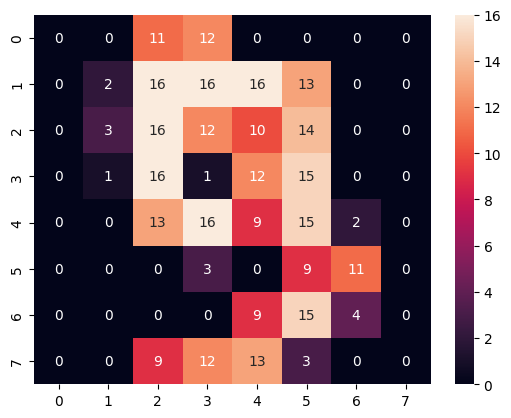

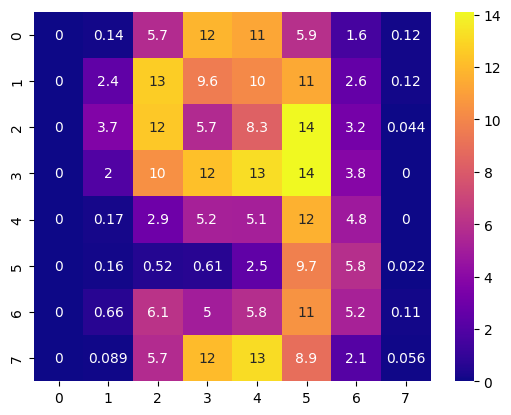

In [24]:
#Config für Magic shit can be Touched
Ziffer=9

#Magic shit dont Touch it
breite=8
Ziffersample=lambda GewünschteZiffer :[[np.array(digits.data[c][n:n+breite]) for n in range(0, len(digits.data[c]), breite)] for c in range(len(digits.data)) if digits.target[c] == GewünschteZiffer]
ZifferMittelWert=lambda GewünschteZiffer:[[sum(row[i] for row in [np.array(digits.data[c]) for c in range(len(digits.data)) if digits.target[c] == GewünschteZiffer]) / len([np.array(digits.data[c]) for c in range(len(digits.data)) if digits.target[c] == GewünschteZiffer]) for i in range(len([np.array(digits.data[c]) for c in range(len(digits.data)) if digits.target[c] == GewünschteZiffer][0]))][c:c+breite] for c in range(0, len([sum(row[i] for row in [np.array(digits.data[c]) for c in range(len(digits.data)) if digits.target[c] == GewünschteZiffer]) / len([np.array(digits.data[c]) for c in range(len(digits.data)) if digits.target[c] == GewünschteZiffer]) for i in range(len([np.array(digits.data[c]) for c in range(len(digits.data)) if digits.target[c] == GewünschteZiffer][0]))]), breite)]

"""
labelgesamt=[np.array(digits.data[c]) for c in range(len(digits.data)) if digits.target[c] == Ziffer]
gesamt=[]
for i in range(len(labelgesamt[0])):
    gesamt.append(sum([row[i] for row in labelgesamt])/len(labelgesamt))

gesamt2 = [sum(row[i] for row in labelgesamt) / len(labelgesamt) for i in range(len(labelgesamt[0]))]
test=[gesamt2[c:c+breite] for c in range(0, len(gesamt2), breite)]
"""

sns.heatmap(Ziffersample(9)[0], annot=True)
plt.show()
sns.heatmap(ZifferMittelWert(9),annot=True,cmap="plasma")
plt.show()

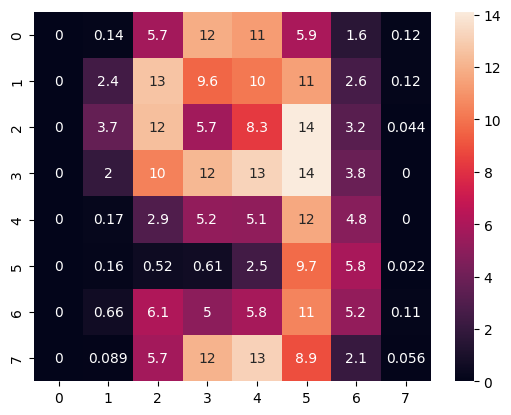

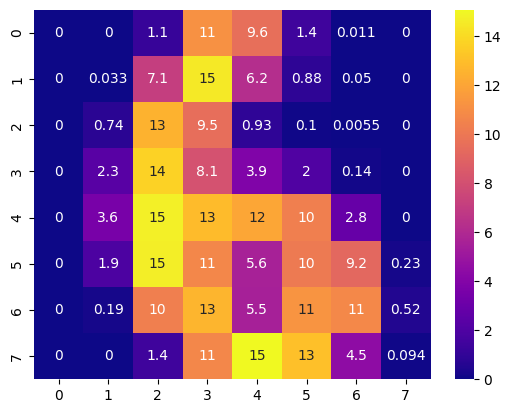

In [25]:
Ziffern=(9,6)
z1,z2= ZifferMittelWert(Ziffern[0]),ZifferMittelWert(Ziffern[1])
sns.heatmap(z1,annot=True)
plt.show()
sns.heatmap(z2,annot=True,cmap="plasma")
plt.show()


## Fehler Bilder mit den vorrausgesagten Werten

In [26]:
grid.fit(X_train,y_train)
y_predict=grid.predict(X_test)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, 

[[67  0  0  0  0  0  0  0  0  0]
 [ 0 72  0  0  0  0  0  0  0  0]
 [ 0  0 66  0  0  0  0  0  0  0]
 [ 0  0  0 69  0  1  0  0  1  0]
 [ 0  0  0  0 78  0  0  0  0  0]
 [ 0  0  0  0  0 83  0  0  0  0]
 [ 0  0  0  0  0  0 69  0  0  0]
 [ 0  0  0  0  0  0  0 70  0  1]
 [ 0  0  0  0  0  0  0  0 65  0]
 [ 0  0  0  1  0  0  0  1  0 75]]


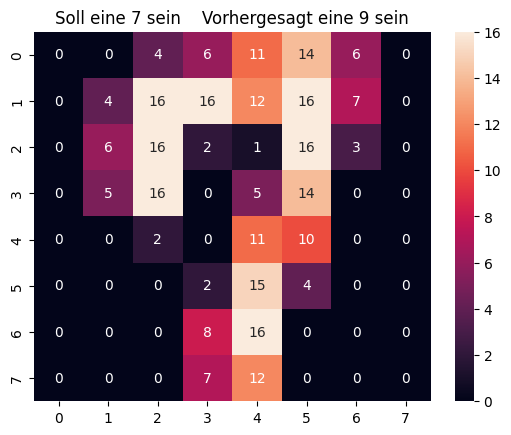

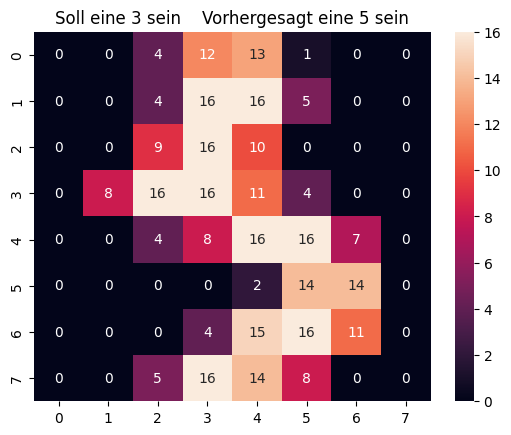

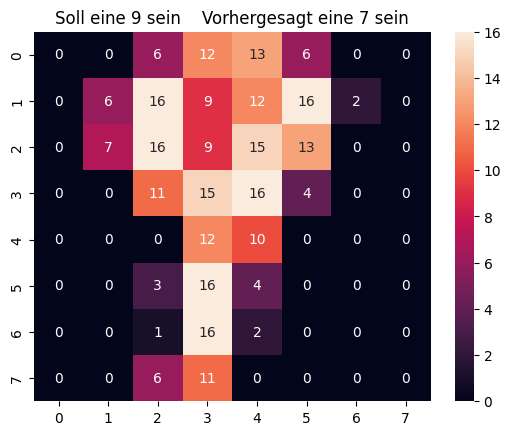

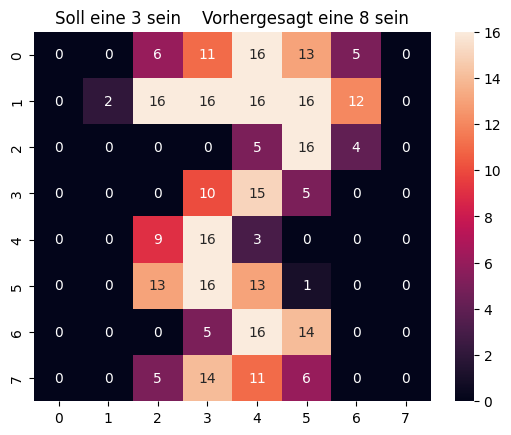

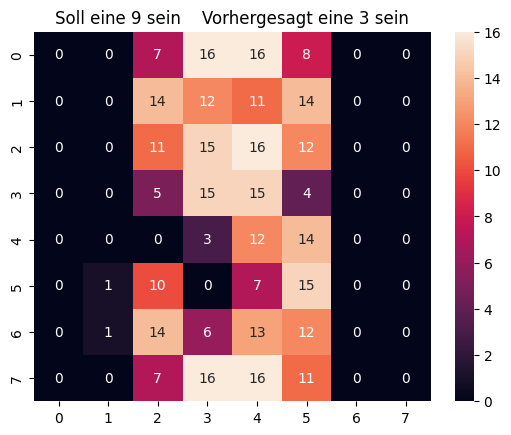

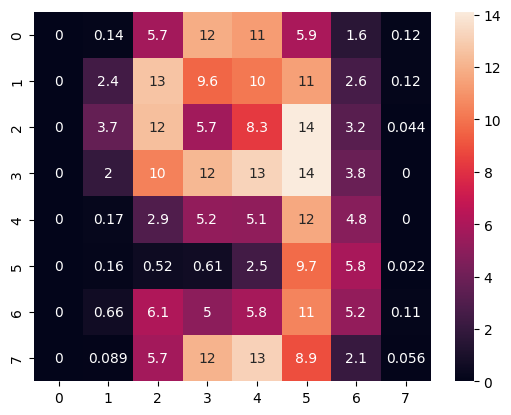

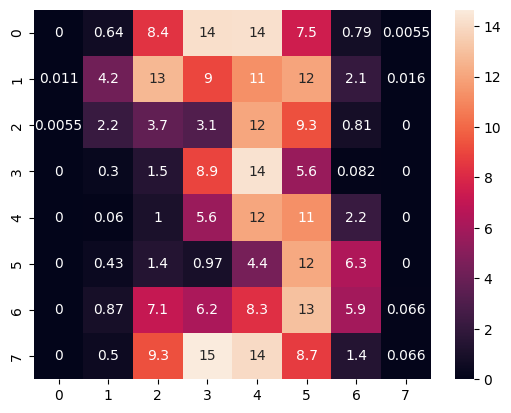

In [27]:

print(confusion_matrix(y_test_klein,y_predict))
ZifferHeatmapFormat=lambda x: [x[c:c+breite]for c in range(0,len(x),breite)]
fehler=[[X_test[c],y_test[c],y_predict[c]] for c in range(len(X_test)) if y_test[c] != y_predict[c]]

for c in range(len(fehler)):
    fehler[c][0]=ZifferHeatmapFormat(fehler[c][0])
    sns.heatmap(fehler[c][0],annot=True)
    plt.title(f"Soll eine {fehler[c][1]} sein    Vorhergesagt eine {fehler[c][2]} sein")
    plt.show()

sns.heatmap(ZifferMittelWert(9),annot=True)
plt.show()
sns.heatmap(ZifferMittelWert(3),annot=True)
plt.show()



